In [19]:
import pandas as pd
import os
import gzip
import numpy as np

Her denek için dosya başlıklarındaki 3 haneli sayılar deney numarasını(deneme sayısını) temsil etmektedir.

# EEG Datasetindeki tar.gz Dosyalarının Listelenmesi

**Denek 1: Alkolikler**

In [20]:
file_names_a = os.listdir('C:/Users/bbari/OneDrive/Belgeler/eeg_database/extracted/a')
print(file_names_a)

['co2a0000364', 'co2a0000365', 'co2a0000368', 'co2a0000369', 'co2a0000370', 'co2a0000371', 'co2a0000372', 'co2a0000375', 'co2a0000377', 'co2a0000378', 'co2a0000379', 'co2a0000380', 'co2a0000381', 'co2a0000382', 'co2a0000384', 'co2a0000385', 'co2a0000386', 'co2a0000387', 'co2a0000388', 'co2a0000390', 'co2a0000392', 'co2a0000394', 'co2a0000395', 'co2a0000396', 'co2a0000398', 'co2a0000400', 'co2a0000402', 'co2a0000403', 'co2a0000404', 'co2a0000405', 'co2a0000406', 'co2a0000407', 'co2a0000409', 'co2a0000410', 'co2a0000411', 'co2a0000412', 'co2a0000414', 'co2a0000415', 'co2a0000416', 'co2a0000417', 'co2a0000418', 'co2a0000419', 'co2a0000421', 'co2a0000422', 'co2a0000423', 'co2a0000424', 'co2a0000425', 'co2a0000426', 'co2a0000427', 'co2a0000428', 'co2a0000429', 'co2a0000430', 'co2a0000432', 'co2a0000433', 'co2a0000434', 'co2a0000435', 'co2a0000436', 'co2a0000437', 'co2a0000438', 'co2a0000439', 'co2a0000440', 'co2a0000443', 'co2a0000444', 'co2a0000445', 'co2a0000447', 'co3a0000448', 'co3a0000

**Denek 2: Kontroller**

In [21]:
file_names_c = os.listdir('C:/Users/bbari/OneDrive/Belgeler/eeg_database/extracted/c')
print(file_names_c)

['co2c0000337', 'co2c0000338', 'co2c0000339', 'co2c0000340', 'co2c0000341', 'co2c0000342', 'co2c0000344', 'co2c0000345', 'co2c0000346', 'co2c0000347', 'co2c0000348', 'co2c0000351', 'co2c0000352', 'co2c0000354', 'co2c0000355', 'co2c0000356', 'co2c0000357', 'co2c0000359', 'co2c0000362', 'co2c0000363', 'co2c0000364', 'co2c0000367', 'co2c0000370', 'co2c0000371', 'co2c0000373', 'co2c0000374', 'co2c0000378', 'co2c0000379', 'co2c0000381', 'co2c0000382', 'co2c0000383', 'co2c0000384', 'co2c0000387', 'co2c0000388', 'co2c0000389', 'co2c0000390', 'co2c0000391', 'co2c0000392', 'co2c0000393', 'co2c0000394', 'co2c0000395', 'co2c0000396', 'co2c0000397', 'co2c1000367', 'co3c0000402']


Datasette toplam 77 alkolik ve 45 kontrol denek bulunmaktadır

# Listelenen Datasetteki gz Uzantılı Datanın Extract İşlemi

**Dosya Yollarının Tek Bir Listede Tutulması**

In [22]:
file_names_list=[]
for file in file_names_a:
    file_names_list.append(os.listdir('C:/Users/bbari/OneDrive/Belgeler/eeg_database/extracted/a/' + file))

**Oluşturulan Listenin Boyutunu Bulma**

In [23]:
count=0
for i in range(0,77):
    count=count+len(file_names_list[i])
print(count)

7033


In [24]:
#dt1=pd.read_csv("C:/Users/bbari/Documents/eeg_database/extracted/a/co2a0000364/co2a0000364.rd.000.gz",sep=" ",skiprows=4)
#dt1

In [25]:
dt1 = pd.DataFrame()
dt2 = pd.DataFrame()
for i in range(0,88):
    #filename="C:/Users/bbari/OneDrive/Belgeler/eeg_database/extracted/a/" + str(file_names_a[i]) + '/' + str(file_names_list[i][j])
    filename='C:/Users/bbari/OneDrive/Belgeler/eeg_database/extracted/a/co2a0000364/' + str(file_names_list[0][i])
    with gzip.open(filename, 'rt') as f:
        dt1=pd.read_csv(f.name,sep=" ",skiprows=4)
        dt2=pd.concat([dt2,dt1])
dt2

,#,FP1,chan,0
0,0,FP1,0,-8.921
1,0,FP1,1,-8.433
2,0,FP1,2,-2.574
3,0,FP1,3,5.239
4,0,FP1,4,11.587
...,...,...,...,...
16442,119,Y,251,-9.145
16443,119,Y,252,-10.610
16444,119,Y,253,-8.657
16445,119,Y,254,-4.751


In [26]:
i = dt2[(dt2["#"] == '#')].index
i

Int64Index([  256,   513,   770,  1027,  1284,  1541,  1798,  2055,  2312,
             2569,
            ...
            13877, 14134, 14391, 14648, 14905, 15162, 15419, 15676, 15933,
            16190],
           dtype='int64', length=5544)

In [27]:
dt2=dt2.drop(i)
dt2

,#,FP1,chan,0
0,0,FP1,0,-8.921
1,0,FP1,1,-8.433
2,0,FP1,2,-2.574
3,0,FP1,3,5.239
4,0,FP1,4,11.587
...,...,...,...,...
16442,119,Y,251,-9.145
16443,119,Y,252,-10.610
16444,119,Y,253,-8.657
16445,119,Y,254,-4.751


In [28]:
dt2.columns = ['deney_num', 'kanal_adı', 'timestamp','voltaj(mV)']
dt2=dt2.sort_values(by="timestamp") #timestamp,deney_num to int 0,0 0,1 0,2
dt2

,deney_num,kanal_adı,timestamp,voltaj(mV)
0,0,FP1,0,-8.921
5654,44,P3,0,-2.665
12850,101,P5,0,-0.488
5911,44,P4,0,-0.621
6168,44,PZ,0,-2.238
...,...,...,...,...
2155,34,F3,99,5.320
12949,97,P5,99,-5.564
12178,39,AFZ,99,4.710
2669,91,FC5,99,-3.805


In [29]:
dt2["timestamp"]=pd.to_numeric(dt2["timestamp"])
dt2["deney_num"]=pd.to_numeric(dt2["deney_num"])

In [30]:
dt2=dt2.sort_values(by=["deney_num","timestamp","kanal_adı"])
dt2

,deney_num,kanal_adı,timestamp,voltaj(mV)
1028,0,AF1,0,-2.146
1285,0,AF2,0,1.129
8224,0,AF7,0,-16.856
8481,0,AF8,0,-10.020
12079,0,AFZ,0,-0.987
...,...,...,...,...
12077,119,TP7,255,-4.934
11820,119,TP8,255,-10.427
8222,119,X,255,-10.661
16446,119,Y,255,-0.844


In [31]:
aa=dt2["voltaj(mV)"].to_numpy()
aa=aa.reshape((aa.shape[0]//64,64))
aa

array([[ -2.146,   1.129, -16.856, ...,  -5.269,  -5.636,  -8.901],
       [ -2.146,   0.641,  -7.09 , ...,  -5.758,  -2.706,  -7.924],
       [ -1.658,  -0.336,   7.558, ...,  -2.828,   1.689,  -3.042],
       ...,
       [ -7.65 ,  -7.202,  -6.938, ..., -15.055,  -8.657,  -8.413],
       [ -3.743,  -5.737,  -4.496, ..., -12.614,  -4.751,  -4.995],
       [ -2.279,  -5.249,  -4.008, ..., -10.661,  -0.844,  -4.018]])

In [32]:
dt3=pd.DataFrame(aa,columns=sorted(dt2["kanal_adı"].unique()))
dt3

,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,C5,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
0,-2.146,1.129,-16.856,-10.020,-0.987,-1.129,2.747,-2.716,-0.926,-8.586,...,5.157,-6.266,-2.797,-6.805,-3.886,-9.338,-3.082,-5.269,-5.636,-8.901
1,-2.146,0.641,-7.090,-7.090,-1.475,-1.617,-1.160,-3.204,-2.879,-11.515,...,7.111,-8.708,-4.262,-9.247,-5.839,-12.268,-4.059,-5.758,-2.706,-7.924
2,-1.658,-0.336,7.558,1.211,-0.987,0.336,0.305,1.678,2.492,-11.027,...,-2.655,-9.196,-4.262,-8.270,-4.374,-8.850,-3.571,-2.828,1.689,-3.042
3,-0.682,-0.824,19.277,10.488,-0.010,0.824,0.305,-0.275,2.981,-6.632,...,-7.050,-6.755,-2.797,-3.876,0.020,-1.526,-1.129,1.567,5.595,4.771
4,2.248,0.641,23.183,13.906,2.431,2.777,2.258,4.608,5.910,1.180,...,-4.120,-3.337,-0.844,1.495,4.415,4.822,2.777,5.961,9.013,11.607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22523,-12.533,-6.714,-8.403,-4.140,-9.033,0.264,-1.648,-2.716,-5.768,-8.921,...,-3.998,1.851,1.719,2.696,3.784,-3.469,-0.661,-13.102,-9.145,-13.295
22524,-11.068,-7.690,-8.403,-9.023,-9.521,-0.712,-1.160,-0.763,-3.326,-6.480,...,2.838,-0.102,0.743,2.696,-1.587,-3.469,-4.567,-15.055,-10.610,-11.342
22525,-7.650,-7.202,-6.938,-11.464,-7.568,-2.177,1.770,-3.693,3.510,-0.621,...,4.303,-1.567,0.254,0.254,-10.864,-3.957,-8.962,-15.055,-8.657,-8.413
22526,-3.743,-5.737,-4.496,-12.441,-5.127,-2.665,2.258,-3.693,5.463,4.262,...,9.674,-1.567,-0.234,-4.628,-15.747,-4.445,-11.403,-12.614,-4.751,-4.995


In [33]:
#file_path = 'C:/Users/bbari/OneDrive/Belgeler/DenemeExcel.xlsx'  #export as excel file
#dt2.head(1000000).to_excel(file_path, index=False)
#count=dt2["kanal_adı"].value_counts()
#count.sort_values(ascending=True)

In [35]:
from sklearn.decomposition import PCA
pca_v1 = PCA(n_components=None, random_state=0)
pca_v1.fit_transform(dt3)
print(pca_v1.explained_variance_ratio_)

[6.20839741e-01 1.45905200e-01 4.29659661e-02 2.99023745e-02
 2.35172933e-02 1.73218431e-02 1.48122375e-02 1.09482707e-02
 9.72834809e-03 8.92453359e-03 8.59581435e-03 7.73247166e-03
 5.74869200e-03 5.25838579e-03 4.94878797e-03 4.39782077e-03
 3.14774415e-03 3.13588156e-03 2.87392332e-03 2.75691145e-03
 2.48985513e-03 2.25456348e-03 2.09817847e-03 2.04805783e-03
 1.89325691e-03 1.86254381e-03 1.47525293e-03 1.37031629e-03
 1.21421373e-03 1.04247471e-03 9.40151569e-04 9.11218443e-04
 8.15622068e-04 7.62320229e-04 6.56096678e-04 6.04763151e-04
 5.00255464e-04 4.31904378e-04 4.00185624e-04 3.65420037e-04
 3.03968044e-04 2.62923889e-04 2.15215666e-04 1.93390919e-04
 1.77287085e-04 1.60666823e-04 1.46459070e-04 1.27492230e-04
 1.12464263e-04 8.72733786e-05 8.49508012e-05 7.96621003e-05
 6.71945372e-05 5.69472437e-05 5.04209814e-05 4.60297059e-05
 4.16846955e-05 3.56726093e-05 3.40201605e-05 3.36084671e-05
 2.88403870e-05 2.36188892e-05 1.82343211e-05 1.30823015e-05]


In [38]:
pca_v2=PCA(n_components=2)
data=pca_v2.fit_transform(dt3)
print(f'%{round(sum(pca_v2.explained_variance_ratio_) * 100,2)}')

%76.67


In [39]:
data

array([[-21.56013501,   3.97338743],
       [-16.69209747,   5.66080951],
       [ -3.78986233,   0.74617021],
       ...,
       [-31.736728  ,  14.92620328],
       [-28.03223385,  12.84794784],
       [-28.44915986,  11.70376902]])

In [40]:
data.shape

(22528, 2)

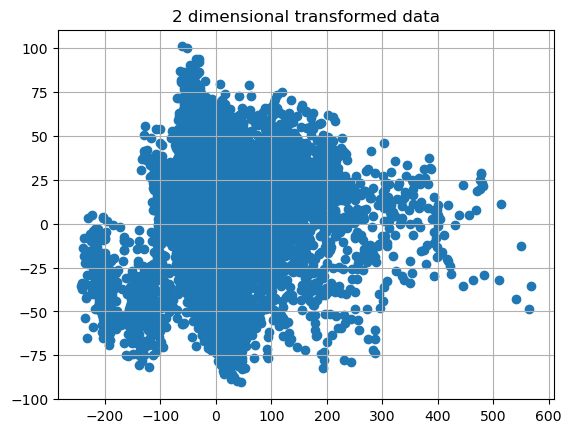

In [41]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1])
plt.title('2 dimensional transformed data')
plt.grid(True)
plt.show()

In [42]:
import sys
print(f"Original memory size: {sys.getsizeof(dt3)} bytes")
print(f"Memory size after PCA: {sys.getsizeof(data)} bytes")

Original memory size: 11534500 bytes
Memory size after PCA: 128 bytes


In [43]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#lda=LDA(n_components=2)
#lda_data = lda.fit_transform(data[:,0], data[:,1])
#lda_data

In [44]:
from sklearn.feature_selection import VarianceThreshold
threshold = 50
var_filt = VarianceThreshold(threshold).fit_transform(dt3)
var_filt

array([[ -2.146,   1.129, -16.856, ...,  -5.269,  -5.636,  -8.901],
       [ -2.146,   0.641,  -7.09 , ...,  -5.758,  -2.706,  -7.924],
       [ -1.658,  -0.336,   7.558, ...,  -2.828,   1.689,  -3.042],
       ...,
       [ -7.65 ,  -7.202,  -6.938, ..., -15.055,  -8.657,  -8.413],
       [ -3.743,  -5.737,  -4.496, ..., -12.614,  -4.751,  -4.995],
       [ -2.279,  -5.249,  -4.008, ..., -10.661,  -0.844,  -4.018]])

In [45]:
var_filt.shape

(22528, 27)

In [47]:
pca_v3 = PCA(n_components=None, random_state=0)
variance_filt=pca_v3.fit_transform(var_filt)
print(pca_v3.explained_variance_ratio_)

[6.78299607e-01 1.28873559e-01 4.22198708e-02 2.68848161e-02
 2.45273776e-02 1.53417151e-02 1.22489241e-02 1.13210442e-02
 1.01364950e-02 9.30627575e-03 7.45522648e-03 7.24785013e-03
 4.61217438e-03 3.36739984e-03 2.98642125e-03 2.66641565e-03
 2.44137676e-03 2.32392538e-03 2.26751083e-03 1.67414439e-03
 1.42449907e-03 1.07181124e-03 7.15248586e-04 3.33057902e-04
 1.75032814e-04 5.98414969e-05 1.83796264e-05]


In [48]:
pca_v4=PCA(n_components=2)
data_f=pca_v4.fit_transform(var_filt)
data_f

array([[-23.14347875,   1.44697362],
       [-18.63032624,   0.28058769],
       [ -4.87142538,  -4.66196636],
       ...,
       [-30.61542498,  17.93715069],
       [-27.90668369,  13.54769742],
       [-28.27283963,  10.89068273]])

In [51]:
print(f'%{round(sum(pca_v4.explained_variance_ratio_) * 100,2)}')

%80.72
